In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None


In [ ]:
import sqlite3

# Read sqlite query results into a pandas DataFrame
#con = sqlite3.connect("EDA Project/ST_DB.sqlite")
#mta = pd.read_sql_query("SELECT * from ST_DB", con)

# Verify that result of SQL query is stored in the dataframe
#print(mta.head())

#con.close()

In [2]:
weeks = [210918, 210911, 210904, 210828,210821,210814,210807,210731,210724,210717,210710,210703,210626,210619]
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
df_list = []
for week in weeks:
    df_list.append(pd.read_csv(url.format(week)))
mta = pd.concat(df_list)


In [3]:
mta


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,00:00:00,REGULAR,7633126,2611933
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,04:00:00,REGULAR,7633141,2611934
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,08:00:00,REGULAR,7633152,2611953
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,12:00:00,REGULAR,7633203,2611997
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,16:00:00,REGULAR,7633308,2612026
...,...,...,...,...,...,...,...,...,...,...,...
209255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,05:00:00,REGULAR,5554,584
209256,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,09:00:00,REGULAR,5554,584
209257,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,13:00:00,REGULAR,5554,584
209258,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,17:00:00,REGULAR,5554,584


The New York subway MTA turnstile data is a series of data files containing cumulative number of entries and exits by station, turnstile, date and time. Data files are produced weekly, data records are collected typically every 4 hours with some exceptions.


In this analysis we use data from the last 3 Months of 2021. Data size is over 5 million.

In [4]:
mta.columns =['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME','DESC','ENTRIES','EXITS']

First we wanted to focus on regular audits rather than Anything elase.

In [5]:
pd.DataFrame(mta[mta.DESC == 'REGULAR'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,00:00:00,REGULAR,7633126,2611933
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,04:00:00,REGULAR,7633141,2611934
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,08:00:00,REGULAR,7633152,2611953
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,12:00:00,REGULAR,7633203,2611997
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,16:00:00,REGULAR,7633308,2612026
...,...,...,...,...,...,...,...,...,...,...,...
209255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,05:00:00,REGULAR,5554,584
209256,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,09:00:00,REGULAR,5554,584
209257,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,13:00:00,REGULAR,5554,584
209258,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,17:00:00,REGULAR,5554,584


Next, we need to make sure the data was sorted in ascending time. To do so, the DATE and TIME columns were concatenated and converted into datetime format.

In [6]:
mta['DATETIME'] = pd.to_datetime(mta.DATE + ' ' + mta.TIME, format='%m/%d/%Y  %H:%M:%S')
mta['DATETIME']=pd.to_datetime(mta.DATETIME)
mta['TURNSTILE'] = mta['C/A'] + '-' + mta['UNIT'] + '-' + mta['SCP']

mta = mta[(mta.DATETIME >= '01-01-18 00:00:00') & (mta.DATETIME <'09-30-21 00:00:00')]

In [7]:
mta.dtypes

C/A                  object
UNIT                 object
SCP                  object
STATION              object
LINENAME             object
DIVISION             object
DATE                 object
TIME                 object
DESC                 object
ENTRIES               int64
EXITS                 int64
DATETIME     datetime64[ns]
TURNSTILE            object
dtype: object

1. Sanity Check
1.1 Original data

First we look for potential abnormal entries and exits values. Since entries and exits are cumulative values, quantiles do not mean anything, but there should not be any negative values. We expect entries to be larger than exits in general, because New York subway stations commonly have emergency exits, which do not collect exit records. Exits are only collected when a passenger exit through a turnstile.

In [8]:
print('Descriptions of entries:')
print(mta['ENTRIES'].describe())
print('')
print('Descriptions of exits:')
print(mta['EXITS'].describe())

Descriptions of entries:
count    2.932689e+06
mean     4.154567e+07
std      2.182202e+08
min      0.000000e+00
25%      2.191160e+05
50%      1.400465e+06
75%      6.001544e+06
max      2.147412e+09
Name: ENTRIES, dtype: float64

Descriptions of exits:
count    2.932689e+06
mean     3.321487e+07
std      1.916933e+08
min      0.000000e+00
25%      1.016850e+05
50%      8.535230e+05
75%      3.970447e+06
max      2.133797e+09
Name: EXITS, dtype: float64


In [9]:
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,00:00:00,REGULAR,7633126,2611933,2021-09-11 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,04:00:00,REGULAR,7633141,2611934,2021-09-11 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,08:00:00,REGULAR,7633152,2611953,2021-09-11 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,12:00:00,REGULAR,7633203,2611997,2021-09-11 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/11/2021,16:00:00,REGULAR,7633308,2612026,2021-09-11 16:00:00,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209255,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,05:00:00,REGULAR,5554,584,2021-06-18 05:00:00,TRAM2-R469-00-05-01
209256,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,09:00:00,REGULAR,5554,584,2021-06-18 09:00:00,TRAM2-R469-00-05-01
209257,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,13:00:00,REGULAR,5554,584,2021-06-18 13:00:00,TRAM2-R469-00-05-01
209258,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/18/2021,17:00:00,REGULAR,5554,584,2021-06-18 17:00:00,TRAM2-R469-00-05-01


1.2 Use differenced data instead

Then we calculate the differences between every two collection timestamps and look for abnormal entries/exits per time interval. NaN values are generated for the very first data record for each unique turnstile during differencing.

In [10]:

mta_sorted = mta.sort_values(['TURNSTILE', 'DATETIME'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['TURNSTILE'])
# turn cumulative counts into counts per interval
mta_sorted['ENTRIES_diff'] = turnstile_grouped['ENTRIES'].transform(pd.Series.diff)
mta_sorted['EXITS_diff'] = turnstile_grouped['EXITS'].transform(pd.Series.diff)

mta_sorted

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE,ENTRIES_diff,EXITS_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,00:00:00,REGULAR,7585482,2593043,2021-06-12 00:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,04:00:00,REGULAR,7585492,2593043,2021-06-12 04:00:00,A002-R051-02-00-00,10.0,0.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,08:00:00,REGULAR,7585498,2593050,2021-06-12 08:00:00,A002-R051-02-00-00,6.0,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,12:00:00,REGULAR,7585546,2593066,2021-06-12 12:00:00,A002-R051-02-00-00,48.0,16.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,16:00:00,REGULAR,7585641,2593068,2021-06-12 16:00:00,A002-R051-02-00-00,95.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/17/2021,05:00:00,REGULAR,5554,643,2021-09-17 05:00:00,TRAM2-R469-00-05-01,0.0,0.0
2932685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/17/2021,09:00:00,REGULAR,5554,643,2021-09-17 09:00:00,TRAM2-R469-00-05-01,0.0,0.0
2932686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/17/2021,13:00:00,REGULAR,5554,643,2021-09-17 13:00:00,TRAM2-R469-00-05-01,0.0,0.0
2932687,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/17/2021,17:00:00,REGULAR,5554,643,2021-09-17 17:00:00,TRAM2-R469-00-05-01,0.0,0.0


In [11]:
#pd.set_option('display.max_rows', None)
mta_sorted.head(10000)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE,ENTRIES_diff,EXITS_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,00:00:00,REGULAR,7585482,2593043,2021-06-12 00:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,04:00:00,REGULAR,7585492,2593043,2021-06-12 04:00:00,A002-R051-02-00-00,10.0,0.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,08:00:00,REGULAR,7585498,2593050,2021-06-12 08:00:00,A002-R051-02-00-00,6.0,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,12:00:00,REGULAR,7585546,2593066,2021-06-12 12:00:00,A002-R051-02-00-00,48.0,16.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2021,16:00:00,REGULAR,7585641,2593068,2021-06-12 16:00:00,A002-R051-02-00-00,95.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,09/16/2021,10:00:00,REGULAR,103153,40837,2021-09-16 10:00:00,A006-R079-00-00-04,9.0,95.0
9996,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,09/16/2021,14:00:00,REGULAR,103186,40863,2021-09-16 14:00:00,A006-R079-00-00-04,33.0,26.0
9997,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,09/16/2021,18:00:00,REGULAR,103367,40892,2021-09-16 18:00:00,A006-R079-00-00-04,181.0,29.0
9998,A006,R079,00-00-04,5 AV/59 ST,NQRW,BMT,09/16/2021,22:00:00,REGULAR,103438,40902,2021-09-16 22:00:00,A006-R079-00-00-04,71.0,10.0


In [12]:
del mta

Sanity check of entries_diff and exits_diff; number of observations with NaN should equal the number of unique turnstiles. entries_diff and exits_diff should always be positive since cumulative values are supposed to increase or at least stay even.

In [13]:
# check distribution of entries_diff and exits_diff
print('Descriptions of entries_diff:')
print(mta_sorted['ENTRIES_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(mta_sorted['EXITS_diff'].describe())

Descriptions of entries_diff:
count    2.927659e+06
mean    -4.606856e+02
std      2.086780e+06
min     -1.383110e+09
25%      3.000000e+00
50%      2.600000e+01
75%      8.300000e+01
max      1.889997e+09
Name: ENTRIES_diff, dtype: float64

Descriptions of exits_diff:
count    2.927659e+06
mean    -8.471182e+01
std      3.121646e+06
min     -2.133741e+09
25%      5.000000e+00
50%      3.000000e+01
75%      9.000000e+01
max      2.133741e+09
Name: EXITS_diff, dtype: float64


In [14]:
print('Number of negative entries_diff: %d' %len(mta_sorted['ENTRIES_diff'][mta_sorted['ENTRIES_diff'] < 0]))
print('Number of negative exits_diff: %d' %len(mta_sorted['EXITS_diff'][mta_sorted['EXITS_diff'] < 0]))
print('Number of unqiue turnstiles: %d' %len(mta_sorted['TURNSTILE'].unique()))
print('Number of NaN rows: %d' %len(mta_sorted[mta_sorted['ENTRIES_diff'].isnull()]))

Number of negative entries_diff: 25620
Number of negative exits_diff: 17415
Number of unqiue turnstiles: 5030
Number of NaN rows: 5030


The max values of entries_diff and exits_diff are more than a million times larger than their 75th percentiles, which is apparently abnormal. Minimum values are negative, which is also abnormal. We will set these outliers as 0. After taking a look at observations with negative _entriesdiffs, we find out that of them have DESC == 'DOOR CLOSE'. It seems that the entry and exit counts might be reset when experiencing door close. It would be inappropriate to infer the correct values for these observations, therefore we will set them as 0. We also set NAs as 0 since they are the first data record for each turnstile.

In [15]:
mta_sorted['ENTRIES_diff'] = mta_sorted['ENTRIES_diff'].fillna(0)
mta_sorted['EXITS_diff'] = mta_sorted['EXITS_diff'].fillna(0)

mta_sorted['ENTRIES_diff'][mta_sorted['ENTRIES_diff'] < 0] = 0 
mta_sorted['EXITS_diff'][mta_sorted['EXITS_diff'] < 0] = 0 


In [46]:
#mta_sorted.to_csv(r'Path where you want to store the exported CSV file\elyasm Name.csv', index = False)



import sqlite3 as sq
data = mta_sorted
sql_data = 'ST_DB.sqlite' #- Creates DB names SQLite
conn = sq.connect(sql_data)
cur = conn.cursor()
cur.execute('''DROP TABLE IF EXISTS ST_DB''')
data.to_sql('ST_DB', conn, if_exists='replace', index=False) # - writes the pd.df to SQLIte DB
#pd.read_sql('select * From C/A', conn)
conn.commit()
conn.close()

# What certain subway station get visited more often than others based on turnstiles?

In [35]:
mta_h = mta_sorted[['TURNSTILE','STATION', 'DATETIME','DATE','TIME', 'ENTRIES_diff','EXITS_diff']]

In [36]:
mta_h

,TURNSTILE,STATION,DATETIME,DATE,TIME,ENTRIES_diff,EXITS_diff
0,A002-R051-02-00-00,59 ST,2021-06-12 00:00:00,06/12/2021,00:00:00,0.0,0.0
1,A002-R051-02-00-00,59 ST,2021-06-12 04:00:00,06/12/2021,04:00:00,10.0,0.0
2,A002-R051-02-00-00,59 ST,2021-06-12 08:00:00,06/12/2021,08:00:00,6.0,7.0
3,A002-R051-02-00-00,59 ST,2021-06-12 12:00:00,06/12/2021,12:00:00,48.0,16.0
4,A002-R051-02-00-00,59 ST,2021-06-12 16:00:00,06/12/2021,16:00:00,95.0,2.0
...,...,...,...,...,...,...,...
2932684,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 05:00:00,09/17/2021,05:00:00,0.0,0.0
2932685,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 09:00:00,09/17/2021,09:00:00,0.0,0.0
2932686,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 13:00:00,09/17/2021,13:00:00,0.0,0.0
2932687,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 17:00:00,09/17/2021,17:00:00,0.0,0.0


In [19]:
mta_h['MORE_VISITED'] = mta_h['ENTRIES_diff'].values + mta_h['EXITS_diff'].values

In [23]:
mta_h

,TURNSTILE,STATION,DATETIME,DATE,TIME,ENTRIES_diff,EXITS_diff,MORE_VISITED
0,A002-R051-02-00-00,59 ST,2021-06-12 00:00:00,06/12/2021,00:00:00,0.0,0.0,0.0
1,A002-R051-02-00-00,59 ST,2021-06-12 04:00:00,06/12/2021,04:00:00,10.0,0.0,10.0
2,A002-R051-02-00-00,59 ST,2021-06-12 08:00:00,06/12/2021,08:00:00,6.0,7.0,13.0
3,A002-R051-02-00-00,59 ST,2021-06-12 12:00:00,06/12/2021,12:00:00,48.0,16.0,64.0
4,A002-R051-02-00-00,59 ST,2021-06-12 16:00:00,06/12/2021,16:00:00,95.0,2.0,97.0
...,...,...,...,...,...,...,...,...
2932684,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 05:00:00,09/17/2021,05:00:00,0.0,0.0,0.0
2932685,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 09:00:00,09/17/2021,09:00:00,0.0,0.0,0.0
2932686,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 13:00:00,09/17/2021,13:00:00,0.0,0.0,0.0
2932687,TRAM2-R469-00-05-01,RIT-ROOSEVELT,2021-09-17 17:00:00,09/17/2021,17:00:00,0.0,0.0,0.0


# 2.The more visited 15 stations

We define more visited as the sum of entries Diff and Diff exits for each time interval (total traffic = entries Diff + exits Diff). The 15 stations shown in the below graph typically have multiple subway lines. Times SQ-42 ST, World Trade CTR, 3 AV-149 ST and Hunts Point AV are also important train/bus stations that connect New York with other cities/states on the east coast. For example, a large number of people commute between New York and New Jersey via Penn Station everyday.

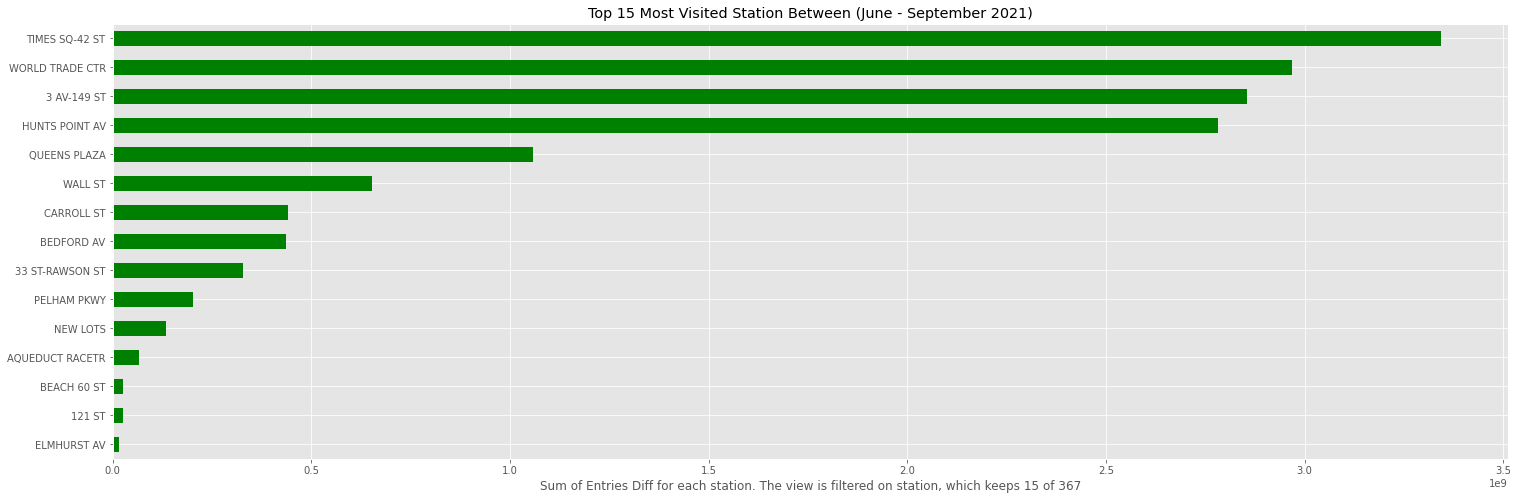

In [22]:
top_15 =mta_h.groupby(['STATION']).agg({'MORE_VISITED': sum}).sort_values(by = 'MORE_VISITED', ascending = False).head(15)

fig, ax = plt.subplots(figsize=(25, 8))
top_15.sort_values(by = 'MORE_VISITED',ascending=True).plot(kind='barh', color ='g',ax=ax)
ax.set(title='Top 15 Most Visited Station Between (June - September 2021)', xlabel='Sum of Entries Diff for each station. The view is filtered on station, which keeps 15 of 367', ylabel='')
ax.legend().set_visible(False)

3. What hour is the more vistied for the station - resampling time series data

The original data records are typically generated every 4 hours. Most data records are collected at 0/4/8/12/16/20, while others are collected at 3/7/11/15/19. We resampled the data using 1 hour as the new time interval. The busiest hour for 34 ST-PENN STATION is 8pm.

In [32]:
mta_p = mta_h[(mta_h['STATION'] == 'TIMES SQ-42 ST')]
mta_p['TIME'] = pd.to_datetime(mta_p['TIME'], format = '%H:%M:%S') # have to be datetime format so that we could resample
mta_p_grouped = mta_p.groupby(['TIME']).agg({'MORE_VISITED': sum}).sort_values(by = 'MORE_VISITED', ascending = False)
mta_p_grouped.resample('60T',convention='end').sum().sort_values(by = 'MORE_VISITED', ascending = False).head()

,MORE_VISITED
TIME,
1900-01-01 16:00:00,3.339319e+09
1900-01-01 20:00:00,1.744056e+06
1900-01-01 12:00:00,1.190914e+06
1900-01-01 00:00:00,9.198660e+05
1900-01-01 08:00:00,4.708010e+05


4 Daily total traffic for all stations in New York

In [30]:
mta_h1busy = mta_h[['DATE', 'MORE_VISITED']].groupby(['DATE']).sum().reset_index()
mta_h1busy['DATE'] = pd.to_datetime(mta_h1busy['DATE'])

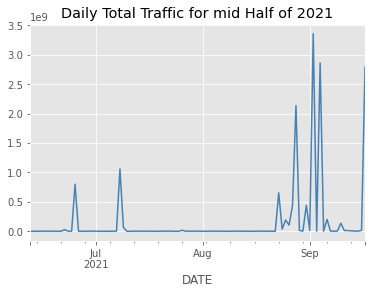

In [31]:
mta_h1busy.set_index('DATE')['MORE_VISITED'].plot(color = 'steelblue')
plt.title('Daily Total Traffic for mid Half of 2021') 
plt.show()

5. Traffic by week of day - periodicity confirmed

In [41]:
#data = generate_dates(start_date)
#date.to_sql("name_table", engine)
len(mta_h['STATION'].unique())


379